# ---- Info ----
The following Notebook contains combined information about credit_card_balance.csv.
## The credit_card_balance.csv description 
 - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

### Remark 1
I do not "play with feature"(create new one out of existing one) in this notebook

### Remark 2
Please do cell by cell and if anything is not clear ask, ask and ask me questions.

## Import necessarry libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


## Load data


In [2]:
cc_balance = pd.read_csv('../Jupyter/input/credit_card_balance.csv')



In [3]:
# number of rows and columns
print("Shape of the data: ",cc_balance.shape)

Shape of the data:  (3840312, 23)


In [4]:
# info about dataset
cc_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [5]:
# head of the dataset
cc_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


## Info
we have only one object which is NAME_CONTRACT_STATUS. It has 7. Hence, this can be easily transfered to int by one-hot encoding

In [6]:
cc_balance["NAME_CONTRACT_STATUS"].value_counts() 

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

In [7]:
#Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(cc_balance)

Your selected dataframe has 23 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


In [9]:
#number of unique classes in each object column
cc_balance.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_STATUS    7
dtype: int64

In [10]:
cc_balance = pd.get_dummies(cc_balance)

print("Shape of the data: ",cc_balance.shape)

Shape of the data:  (3840312, 29)


In [11]:
missing_values_table(cc_balance)


Your selected dataframe has 29 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


## show how many values are missing(tbh done above)

In [12]:
cc_balance.isnull().sum()


SK_ID_PREV                                 0
SK_ID_CURR                                 0
MONTHS_BALANCE                             0
AMT_BALANCE                                0
AMT_CREDIT_LIMIT_ACTUAL                    0
AMT_DRAWINGS_ATM_CURRENT              749816
AMT_DRAWINGS_CURRENT                       0
AMT_DRAWINGS_OTHER_CURRENT            749816
AMT_DRAWINGS_POS_CURRENT              749816
AMT_INST_MIN_REGULARITY               305236
AMT_PAYMENT_CURRENT                   767988
AMT_PAYMENT_TOTAL_CURRENT                  0
AMT_RECEIVABLE_PRINCIPAL                   0
AMT_RECIVABLE                              0
AMT_TOTAL_RECEIVABLE                       0
CNT_DRAWINGS_ATM_CURRENT              749816
CNT_DRAWINGS_CURRENT                       0
CNT_DRAWINGS_OTHER_CURRENT            749816
CNT_DRAWINGS_POS_CURRENT              749816
CNT_INSTALMENT_MATURE_CUM             305236
SK_DPD                                     0
SK_DPD_DEF                                 0
NAME_CONTR

In [13]:
values_missing = cc_balance[['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT','CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_POS_CURRENT']]

In [14]:
values_missing[values_missing['AMT_DRAWINGS_ATM_CURRENT'].isna()]


,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_POS_CURRENT
45,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3840272,NaN,NaN,NaN,NaN,NaN
3840303,NaN,NaN,NaN,NaN,NaN
3840306,NaN,NaN,NaN,NaN,NaN
3840307,NaN,NaN,NaN,NaN,NaN


# IMPORTANT
if you do next cell you will have to fill median only for CNT_INSTALMENT_MATURE_CUM and AMT_INST_MIN_REGULARITY.
Other columns are deleted, hence should be skipped.


In [18]:
cc_balance.columns[cc_balance.isnull().mean() < 0.10]


Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT',
       'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD',
       'SK_DPD_DEF', 'NAME_CONTRACT_STATUS_Active',
       'NAME_CONTRACT_STATUS_Approved', 'NAME_CONTRACT_STATUS_Completed',
       'NAME_CONTRACT_STATUS_Demand', 'NAME_CONTRACT_STATUS_Refused',
       'NAME_CONTRACT_STATUS_Sent proposal', 'NAME_CONTRACT_STATUS_Signed'],
      dtype='object')

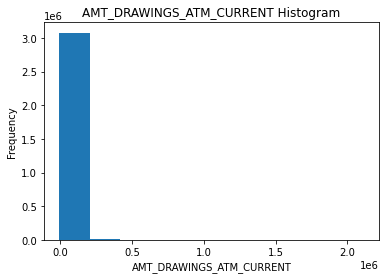

In [16]:
cc_balance['AMT_DRAWINGS_ATM_CURRENT'].plot.hist(title="AMT_DRAWINGS_ATM_CURRENT Histogram");
plt.xlabel('AMT_DRAWINGS_ATM_CURRENT');

median_1=cc_balance['AMT_DRAWINGS_ATM_CURRENT'].median()
median_1
cc_balance['AMT_DRAWINGS_ATM_CURRENT'].replace(np.nan,median_1,inplace=True)



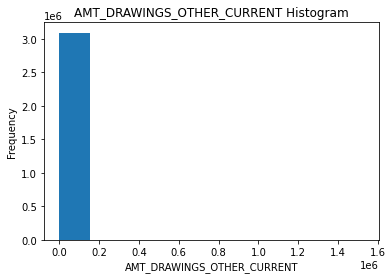

In [17]:
cc_balance['AMT_DRAWINGS_OTHER_CURRENT'].plot.hist(title="AMT_DRAWINGS_OTHER_CURRENT Histogram");
plt.xlabel('AMT_DRAWINGS_OTHER_CURRENT');

median_2=cc_balance['AMT_DRAWINGS_OTHER_CURRENT'].median()
median_2

cc_balance['AMT_DRAWINGS_OTHER_CURRENT'].replace(np.nan,median_2,inplace=True)


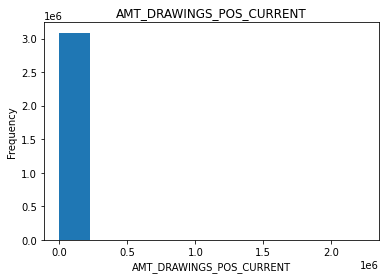

In [18]:
cc_balance['AMT_DRAWINGS_POS_CURRENT'].plot.hist(title='AMT_DRAWINGS_POS_CURRENT');
plt.xlabel('AMT_DRAWINGS_POS_CURRENT');

median_3=cc_balance['AMT_DRAWINGS_POS_CURRENT'].median()
median_3
cc_balance['AMT_DRAWINGS_POS_CURRENT'].replace(np.nan,median_3,inplace=True)


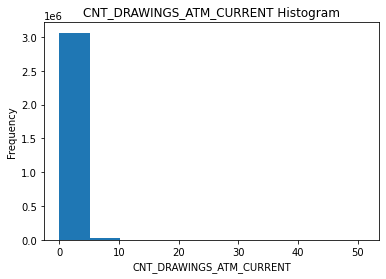

In [19]:
cc_balance['CNT_DRAWINGS_ATM_CURRENT'].plot.hist(title='CNT_DRAWINGS_ATM_CURRENT Histogram');
plt.xlabel('CNT_DRAWINGS_ATM_CURRENT');

median_4=cc_balance['CNT_DRAWINGS_ATM_CURRENT'].median()
median_4
cc_balance['CNT_DRAWINGS_ATM_CURRENT'].replace(np.nan,median_4,inplace=True)


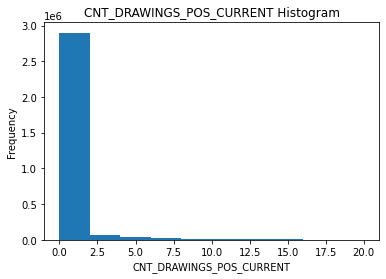

In [20]:
cc_balance['CNT_DRAWINGS_POS_CURRENT'].plot.hist(title='CNT_DRAWINGS_POS_CURRENT Histogram',range=[0,20]);
plt.xlabel('CNT_DRAWINGS_POS_CURRENT');
cc_balance['CNT_DRAWINGS_POS_CURRENT'].value_counts()
# since we have so outliers i will use median 
median_5=cc_balance['CNT_DRAWINGS_POS_CURRENT'].median()
median_5
cc_balance['CNT_DRAWINGS_POS_CURRENT'].replace(np.nan,median_5,inplace=True)


In [21]:
#Check duplicates
duplicate = cc_balance.duplicated()
print(duplicate.sum())


0


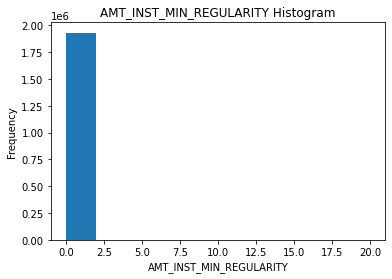

In [22]:
cc_balance['AMT_INST_MIN_REGULARITY'].plot.hist(title='AMT_INST_MIN_REGULARITY Histogram',range=[0,20]);
plt.xlabel('AMT_INST_MIN_REGULARITY'); 
median_6=cc_balance['AMT_INST_MIN_REGULARITY'].median()
median_6
cc_balance['AMT_INST_MIN_REGULARITY'].replace(np.nan,median_6,inplace=True)


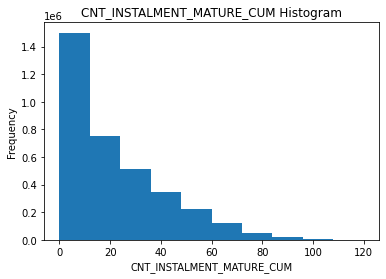

In [23]:
cc_balance['CNT_INSTALMENT_MATURE_CUM'].plot.hist(title='CNT_INSTALMENT_MATURE_CUM Histogram');
plt.xlabel('CNT_INSTALMENT_MATURE_CUM'); 
median_7=cc_balance['CNT_INSTALMENT_MATURE_CUM'].median()
median_7
cc_balance['AMT_INST_MIN_REGULARITY'].replace(np.nan,median_7,inplace=True)


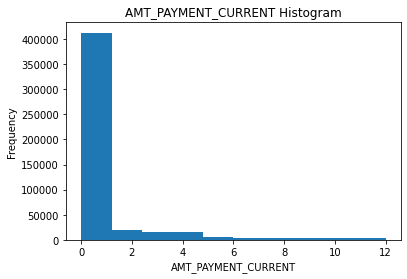

In [24]:
cc_balance['AMT_PAYMENT_CURRENT'].plot.hist(title='AMT_PAYMENT_CURRENT Histogram',range=[0,1*10^6]);
plt.xlabel('AMT_PAYMENT_CURRENT'); 
median_8=cc_balance['AMT_PAYMENT_CURRENT'].median()

median_8
cc_balance['AMT_PAYMENT_CURRENT'].replace(np.nan,median_8,inplace=True)


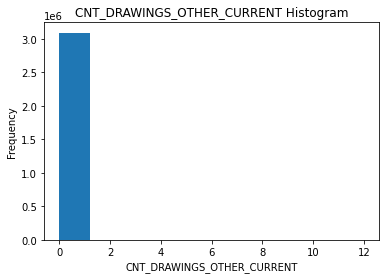

In [25]:
cc_balance['CNT_DRAWINGS_OTHER_CURRENT'].plot.hist(title="CNT_DRAWINGS_OTHER_CURRENT Histogram");
plt.xlabel('CNT_DRAWINGS_OTHER_CURRENT');

median_9=cc_balance['CNT_DRAWINGS_OTHER_CURRENT'].median()
median_9
cc_balance['CNT_DRAWINGS_OTHER_CURRENT'].replace(np.nan,median_9,inplace=True)





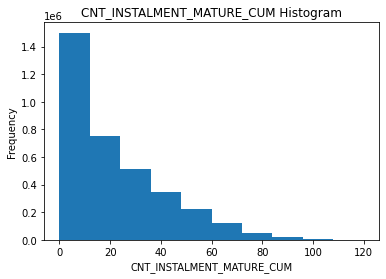

In [26]:
cc_balance['CNT_INSTALMENT_MATURE_CUM'].plot.hist(title="CNT_INSTALMENT_MATURE_CUM Histogram");
plt.xlabel('CNT_INSTALMENT_MATURE_CUM');

median_10=cc_balance['CNT_INSTALMENT_MATURE_CUM'].median()
median_10
cc_balance['CNT_INSTALMENT_MATURE_CUM'].replace(np.nan,median_10,inplace=True)


In [27]:
# test = cc_balance.copy()
# test["AMT_PAYMENT_CURRENT"].replace(np.nan,median_8,inplace=True)

In [28]:
# test['AMT_PAYMENT_CURRENT'].plot.hist(title='AMT_PAYMENT_CURRENT Histogram',range=[0,1*10^6]);
# plt.xlabel('AMT_PAYMENT_CURRENT'); 
# median_8=test['AMT_PAYMENT_CURRENT'].median()
# print(median_8)

In [29]:
print(median_1)
print(median_2)
print(median_3)
print(median_4)
print(median_5)
print(median_6)
print(median_7)
print(median_8)
print(median_9)
print(median_10)


#missing_values_table(cc_balance)
# app_train['TARGET']= df2['TARGE']

0.0
0.0
0.0
0.0
0.0
0.0
15.0
2702.7
0.0
15.0


In [20]:
df1 = pd.read_csv('../Jupyter/input/application_train.csv')
df1.shape

(307511, 122)

In [21]:
cc_balance['TARGET']=df1['TARGET']

In [1]:
# cc_balance.isnull().sum()
3840312-307511


3532801

In [33]:
cc_balance.isnull().sum()

SK_ID_PREV                                  0
SK_ID_CURR                                  0
MONTHS_BALANCE                              0
AMT_BALANCE                                 0
AMT_CREDIT_LIMIT_ACTUAL                     0
AMT_DRAWINGS_ATM_CURRENT                    0
AMT_DRAWINGS_CURRENT                        0
AMT_DRAWINGS_OTHER_CURRENT                  0
AMT_DRAWINGS_POS_CURRENT                    0
AMT_INST_MIN_REGULARITY                     0
AMT_PAYMENT_CURRENT                         0
AMT_PAYMENT_TOTAL_CURRENT                   0
AMT_RECEIVABLE_PRINCIPAL                    0
AMT_RECIVABLE                               0
AMT_TOTAL_RECEIVABLE                        0
CNT_DRAWINGS_ATM_CURRENT                    0
CNT_DRAWINGS_CURRENT                        0
CNT_DRAWINGS_OTHER_CURRENT                  0
CNT_DRAWINGS_POS_CURRENT                    0
CNT_INSTALMENT_MATURE_CUM                   0
SK_DPD                                      0
SK_DPD_DEF                        

In [22]:
cc_balance = cc_balance[cc_balance['TARGET'].notna()]


In [35]:
cc_balance.isnull().sum()


SK_ID_PREV                            0
SK_ID_CURR                            0
MONTHS_BALANCE                        0
AMT_BALANCE                           0
AMT_CREDIT_LIMIT_ACTUAL               0
AMT_DRAWINGS_ATM_CURRENT              0
AMT_DRAWINGS_CURRENT                  0
AMT_DRAWINGS_OTHER_CURRENT            0
AMT_DRAWINGS_POS_CURRENT              0
AMT_INST_MIN_REGULARITY               0
AMT_PAYMENT_CURRENT                   0
AMT_PAYMENT_TOTAL_CURRENT             0
AMT_RECEIVABLE_PRINCIPAL              0
AMT_RECIVABLE                         0
AMT_TOTAL_RECEIVABLE                  0
CNT_DRAWINGS_ATM_CURRENT              0
CNT_DRAWINGS_CURRENT                  0
CNT_DRAWINGS_OTHER_CURRENT            0
CNT_DRAWINGS_POS_CURRENT              0
CNT_INSTALMENT_MATURE_CUM             0
SK_DPD                                0
SK_DPD_DEF                            0
NAME_CONTRACT_STATUS_Active           0
NAME_CONTRACT_STATUS_Approved         0
NAME_CONTRACT_STATUS_Completed        0


In [23]:
# Find correlations with the target and sort
correlations = cc_balance.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))




Most Positive Correlations:
 SK_DPD                            0.000092
NAME_CONTRACT_STATUS_Completed    0.000272
AMT_RECEIVABLE_PRINCIPAL          0.000383
AMT_TOTAL_RECEIVABLE              0.000407
AMT_RECIVABLE                     0.000412
SK_ID_PREV                        0.000446
AMT_BALANCE                       0.000448
AMT_CREDIT_LIMIT_ACTUAL           0.000515
SK_ID_CURR                        0.001086
AMT_INST_MIN_REGULARITY           0.001435
AMT_DRAWINGS_ATM_CURRENT          0.001520
CNT_DRAWINGS_ATM_CURRENT          0.001908
NAME_CONTRACT_STATUS_Signed       0.003493
TARGET                            1.000000
NAME_CONTRACT_STATUS_Approved          NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 AMT_DRAWINGS_POS_CURRENT             -0.003518
NAME_CONTRACT_STATUS_Demand          -0.003016
AMT_DRAWINGS_OTHER_CURRENT           -0.002672
CNT_DRAWINGS_POS_CURRENT             -0.002387
CNT_DRAWINGS_OTHER_CURRENT           -0.001833
CNT_DRAWINGS_CURRENT            

## INORMATION
as you can see the correlations are poor; the biggest one is -0.003518 which is -0.3518%
probably is good to leave this .csv file. Maybe some(3-5 features) are good for data visualisation but I can't see anything special here.